# SI 370 Homework #3

## Taylor Swift songs

Last updated 2023-10-04


The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.


We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.


Each of the questions is worth the same number of points, except for the final bonus question, which is worth up to an additional 1 point (out of 20). Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered. Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is
  accompanied by a written interpretation in a Markdown block. Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications). Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors. Minor stylistic flaws, either in code or in
  written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
  in written interpretations.
- 25-45%: Question is perfunctorily attempted. Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.


Q1: Show the distribution of the popularity of the songs. Then exclude the songs that are from karaoke albums (i.e., the album name contains "karaoke"). Show the distribution of the popularity of the songs. What is the difference between the two distributions?


In [221]:
import pandas as pd
import seaborn as sns


In [222]:
songs = pd.read_csv('../data/taylor_swift_spotify.csv', index_col=0)


[Text(0.5, 1.0, "Distribution of Taylor Swift's Popularity for ALL Songs"),
 Text(0, 0.5, ' Popularity Score')]

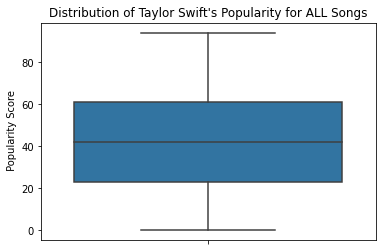

In [245]:
sns.boxplot(data=songs, y="popularity").set(
    title="Distribution of Taylor Swift's Popularity for ALL Songs", ylabel=" Popularity Score")


In [224]:
no_karaoke = songs[~songs['album'].str.contains('Karaoke')]


[Text(0.5, 1.0, "Distribution of Taylor Swift's Popularity for Non-Karaoke Songs"),
 Text(0, 0.5, ' Popularity Score')]

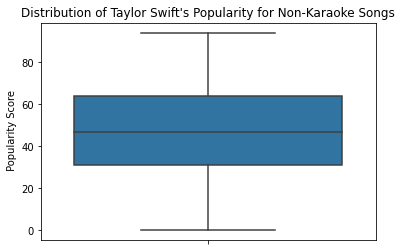

In [246]:
sns.boxplot(data=no_karaoke, y="popularity").set(
    title="Distribution of Taylor Swift's Popularity for Non-Karaoke Songs", ylabel=" Popularity Score")


From the boxplot above, we can see that the distribution of popularity scores for both all songs and non-karoke songs is roughly symetterical. However, we can see that the median popularity for non-karaoke songs is slightly higher (roughly 45 over 42).


### <font color='magenta'>IMPORTANT NOTE: the remainder of the questions are based on the songs that are NOT from karaoke albums.</font>


Q2: Report the average track duration for each album. You answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset.


In [226]:
import datetime


In [227]:
def convert_to_minutes_and_seconds(milliseconds):
    seconds = milliseconds / 1000
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    duration = datetime.timedelta(minutes=minutes, seconds=remaining_seconds)
    return duration


In [228]:
no_karaoke['duration_mm:ss'] = no_karaoke['duration_ms'].apply(
    convert_to_minutes_and_seconds)


/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_48774/1209330502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_karaoke['duration_mm:ss'] = no_karaoke['duration_ms'].apply(convert_to_minutes_and_seconds)


In [248]:
no_karaoke.groupby("album")["duration_mm:ss"].mean().sort_values()


album
Taylor Swift (Big Machine Radio Release Special)                                      0 days 00:02:26.541966666
Fearless (Big Machine Radio Release Special)                                          0 days 00:02:33.937615384
1989 (Big Machine Radio Release Special)                                              0 days 00:02:37.213307692
Red (Big Machine Radio Release Special)                                               0 days 00:02:38.172593750
reputation (Big Machine Radio Release Special)                                        0 days 00:02:44.270354838
Speak Now (Big Machine Radio Release Special)                                         0 days 00:02:59.268464285
Midnights                                                                             0 days 00:03:23.718307692
Lover                                                                                 0 days 00:03:26.187833333
Midnights (3am Edition)                                                                  0 days 00

From the group by object above, we can see the average song duration of each albumn in minute:second format. From sorting values, we can also see that the album with the shortest mean song duration is "Taylor Swift (Big Machine Radio Release Special)".


Q3: Show a heatmap of the correlations between the features. Use a diverging colormap with white in the middle (i.e. white at a correlation of 0.0).


In [230]:
feature_columns = ['danceability', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
features = no_karaoke[feature_columns]


[Text(0.5, 1.0, 'Correlation of Song Features')]

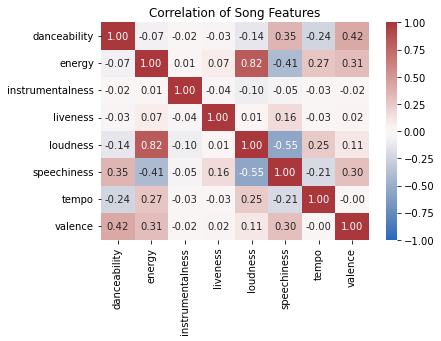

In [231]:
sns.heatmap(features.corr(), cmap=sns.color_palette("vlag", as_cmap=True), vmin=-
            1.0, vmax=1.0, fmt='0.2f', annot=True).set(title="Correlation of Song Features")


The heatmap above shows the correlation between song features for non-karaoke Taylor Swift songs. From the graph, we see that the highest positvie correlation is between loudness and energy (0.82) and the biggest negativie correlation is between loudness and speechiness (-0.52).


Q4: List the top 5 correlations between the features of the songs.


In [232]:
features_corr = features.corr()
features_corr.unstack()
top5 = features_corr.unstack().sort_values(
    key=abs, ascending=False).drop_duplicates().reset_index()
top5.columns = ['varl', 'var2', 'corr']
top5 = top5[top5['corr'] != 1].head()
top5


,varl,var2,corr
1,energy,loudness,0.817729
2,loudness,speechiness,-0.549766
3,danceability,valence,0.415063
4,energy,speechiness,-0.409169
5,speechiness,danceability,0.350922


Q5: Does the position of the track on the album (i.e. track number) have an effect on the popularity of the song? Use both visual and statistical evidence to support your answer.


In [233]:
no_karaoke['track_number'].corr(no_karaoke['popularity'])


-0.17403554033698443

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46')]

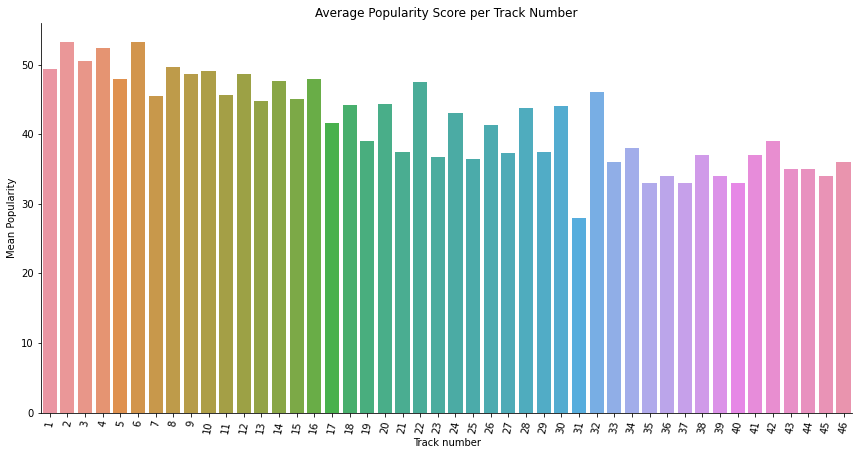

In [234]:
grouped_tracks = no_karaoke.groupby(
    "track_number")["popularity"].mean().reset_index()

sns.relplot(height=6, aspect=2)
ax = sns.barplot(data=grouped_tracks, x="track_number", y="popularity")
ax.set(title="Average Popularity Score per Track Number",
       xlabel="Track number", ylabel="Mean Popularity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


From calculating the correlation coefficient between the track number and popularity column and deriving a value of -0.17, we can see that there is relatively weak negative linear relationship between track number and popularity. From the bar graph, we can also see a gradual decline in mean song popularity score as the track number position increases.


Q6: Are popular songs more danceable?
Divide the songs into popular (i.e. those with a popularity rating of 60 or higher) and less popular (i.e. those with a popularity rating of less than 60).
Conduct an ANOVA test for the two groups of data based on danceability feature. Are they statistically significant?


In [235]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [236]:
no_karaoke['popularity_binary'] = no_karaoke['popularity'].apply(
    lambda x: 1 if x >= 60 else 0)


/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_48774/3869795640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_karaoke['popularity_binary'] = no_karaoke['popularity'].apply(lambda x: 1 if x >= 60 else 0)


In [237]:
lm1 = ols('popularity_binary ~ danceability', data=no_karaoke).fit()
table1 = sm.stats.anova_lm(lm1, typ=2)
print(table1)


                  sum_sq      df         F    PR(>F)
danceability    0.964504     1.0  4.435697  0.035427
Residual      233.314566  1073.0       NaN       NaN


From the ANOVA test above, it does seem that popular songs are statistically significantly more danceable than less popular songs as the p-value (0.035) is less than 0.05.


Q7: Create a regression model with "popularity" as the dependent variable and "liveness" as the predictor variable.
Report the following:

1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "popularity" when the value of "liveness" is 0.22.


In [238]:
import statsmodels.formula.api as smf


In [239]:
model = smf.ols(formula='Q("popularity") ~ Q("liveness")',
                data=no_karaoke).fit()
r_squared = model.rsquared
p_value = model.f_pvalue
estimate = model.predict(pd.DataFrame({'liveness': [0.22]}))[0]
r_squared, p_value, estimate


(0.00934790425683385, 0.001504753707848027, 46.302955989622696)

An r-squared value of 0.009 means that 0.9% of the variance in liveness can be explained by popularity in the regression model. Since the p-value 0.0015 is smaller than 0.05, we can reject the null hypothesis and confirm the regression is stastistically significant. When the value of liveness is 0.22,the popularity score is 46.30.


Q8: Due to intellectual property conflicts, Taylor Swift re-recorded some of her earlier albums, including `Fearless`, `Red` and `Speak Now`. We assume that re-recording her early albums will allow Taylor Swift to reclaim her artistry control, revisit the songs and make any changes she wants. Therefore, we want to see whether the new songs are more loved by the audiences by looking at the popularity score.

- The re-recorded ones have `(Taylor’s version)` at the end of the album name.
- We will ignore the Speak Now World Tour Live version. Therefore there are 5 albums as original and 3 as re-recorded

a) Create a visualization that shows the distribution of popularity scores of original vs. re-recorded songs. There are multiple visualizations that would be appropriate here. You can choose any of them. At a minimum, you should create one visualization. Creating additional ones can earn you additional points.

b) Is there a statistically significant difference between the popularity scores of the original and re-recorded songs? If so, which one is more popular? How much more popular is it, on average?


In [240]:
old_songs = no_karaoke[no_karaoke['album'].str.contains('Red|Fearless')]


In [241]:
old_songs['re_recorded'] = old_songs['album'].apply(
    lambda x: 1 if "(Taylor's Version)" in x else 0)


/var/folders/87/p9hpbw597nb9frsx8622mh_c0000gn/T/ipykernel_48774/3621644444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_songs['re_recorded'] = old_songs['album'].apply(lambda x: 1 if "(Taylor's Version)" in x else 0)


[Text(0.5, 1.0, 'Distribution on Popularity Scores'),
 Text(0.5, 0, 'Re-recorded'),
 Text(0, 0.5, ' Popularity Score')]

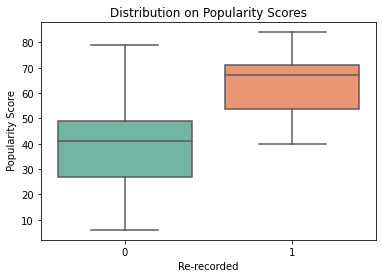

In [242]:
sns.boxplot(x='re_recorded', y='popularity', data=old_songs, palette='Set2').set(
    title="Distribution on Popularity Scores", xlabel="Re-recorded", ylabel=" Popularity Score")


[Text(0.5, 1.0, 'Distribution on Popularity Scores'),
 Text(0.5, 0, 'Re-recorded'),
 Text(0, 0.5, ' Popularity Score')]

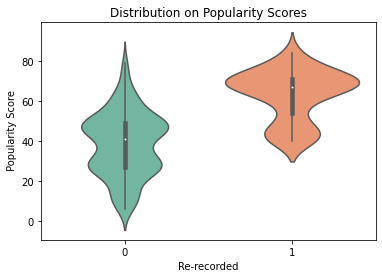

In [249]:
sns.violinplot(x='re_recorded', y='popularity', data=old_songs, palette='Set2').set(
    title="Distribution on Popularity Scores", xlabel="Re-recorded", ylabel=" Popularity Score")


In [243]:
lm1 = ols('re_recorded ~ popularity', data=old_songs).fit()
table1 = sm.stats.anova_lm(lm1, typ=2)
print(table1)


               sum_sq     df           F        PR(>F)
popularity  21.725898    1.0  171.949044  5.431048e-32
Residual    42.327515  335.0         NaN           NaN


From the boxplot and violin plots above, there does appear a difference in distribution of popularity scores among original (re-recorded = 0) and re-recorded (re-recorded = 1) songs. Most notably, the median popularity score of re-recorded songs is much higher at around 67 compared to 42. Additionally from the ANOVA test, it does seem that re-recorded songs are statistically significantly more popular than original songs as the p-value (5.42e-32) is less than 0.05. From the F statistic, it also looks like re-recorded songs are more popular by 171.95 points on average.


BONUS, worth up to 1 point: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)? What data would you need? What analysis would you perform? What would you expect the results to be?


To determine if Taylor Swift has had an effect on popularity of football, we would need data looking at the number of football viewers (both on cable and streaming platforms) across all games throughout history. We could divided that data into two groups: those games before Taylor Swift started dating Travis Kelce and those games before. We could then conduct an ANOVA test to see if there is a statsitically significant difference in mean football viewers between the two groups. I expect that there would be a slight increase in football viewers after Taylor started datihng Travis as non football fans will now be turning on his games.


### Submit your completed assignment in both IPYNB and HTML formats.
